# WeatherPy

## Analysis & Observations
### 1. Plots are shwon here, and the Relationship Between Weather Variables and Latitude
### 2. Dataset used are via OpenWeatherMap API , to generate Random Geographic Coordinates and a List of Cities
### 3. Analysis and code help from the instructor's and TA


In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [60]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


In [61]:
# list of cities
cities

['jalai nur',
 'zyryanovsk',
 'port glaud',
 'blackmans bay',
 'whakatane',
 'port-aux-francais',
 'iqaluit',
 'grytviken',
 'necochea',
 'adamstown',
 'hawaiian paradise park',
 'thompson',
 'camocim',
 'amos',
 'east london',
 'vilyuchinsk',
 'port mathurin',
 'papatowai',
 'brookings',
 'tolanaro',
 'ribeira grande',
 'waitangi',
 'vorgashor',
 'talnakh',
 'whangarei',
 'enriquillo',
 'bethel',
 'ushuaia',
 'yellowknife',
 'bathsheba',
 'san felipe',
 'kashary',
 "muzayri'",
 'minas de marcona',
 'tiksi',
 'uturoa',
 'saint-joseph',
 'bintulu',
 'pago pago',
 'susuman',
 'aasiaat',
 'hermanus',
 'petropavlovsk-kamchatsky',
 'fernie',
 'taroudant',
 'puerto ayora',
 'taiohae',
 'ust-nera',
 'whitefish',
 "nar'yan-mar",
 'muravlenko',
 'whitehorse',
 'edinburgh of the seven seas',
 'west island',
 'gorontalo',
 'inhambane',
 'san jose de jachal',
 'avarua',
 'taguatinga',
 "'ohonua",
 'saipan',
 'nizhniy kuranakh',
 'cabedelo',
 'farasan',
 'puerto san carlos',
 "cooper's town",
 'hol

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [62]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[0:10]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # sleep
    time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jalai nur
Processing Record 2 of Set 1 | zyryanovsk
Processing Record 3 of Set 1 | port glaud
City not found. Skipping...
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | whakatane
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | necochea
Processing Record 10 of Set 1 | adamstown
-----------------------------
Data Retrieval Complete      
-----------------------------


In [63]:
rows = []

# loop cities
for city in cities[0:30]:
    
    try:

        # geolocation
        geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={weather_api_key}"
        response = requests.get(geo_url)

        if (response.status_code == 200):
            # do work
            geo_data = response.json()

            # get lat, lon, country, name
            if len(geo_data) > 0:
                lat = geo_data[0].get("lat", np.nan)
                lon = geo_data[0].get("lon", np.nan)
                country = geo_data[0].get("country", None)
                name = geo_data[0].get("name", None)

        #         print(f"{city} is located at {lat},{lon}")

                if (lat and lon):
                    # weather
                    weather_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial"
                    response2 = requests.get(weather_url)

                    if (response2.status_code == 200):
                        weather_data = response2.json()

                        # extract data
                        temp = weather_data.get("main", {}).get("temp", np.nan)
                        pressure = weather_data.get("main", {}).get("pressure", np.nan)
                        humidity = weather_data.get("main", {}).get("humidity", np.nan)
                        wind_speed = weather_data.get("wind", {}).get("speed", np.nan)
                        cloudiness = weather_data.get("clouds", {}).get("all", np.nan)
                        date = wind_speed = weather_data.get("dt", np.nan)

                        # build row
                        row = {"city": name,
                               "country": country,
                               "latitude": lat,
                               "longitude": lon,
                               "temperature": temp,
                               "pressure": pressure,
                               "humidity": humidity,
                               "wind_speed": wind_speed,
                              "cloudiness": cloudiness,
                              "date": date}

            #             print(row)
                        rows.append(row)

                    else:
                        print(f"Getting Weather Data failed with status code: {response2.status_code}. More info below:")
                        print(weather_data)
                else:
                    print("failed to extract lat and lon from response")
                    print(geo_data)
            else:
                print(f"did not find any geolocation data for city: {city}")
        else:
            print(f"Getting geolocation data failed with status code: {response.status_code}. More info below:")
            print(geo_data)
    except Exception as e:
        print(f"Something went terribly wrong for {city}")
        print(e)
    
    # sleep 
    print(f"{city} was processed successfully.")
    time.sleep(1)

jalai nur was processed successfully.
did not find any geolocation data for city: zyryanovsk
zyryanovsk was processed successfully.
port glaud was processed successfully.
blackmans bay was processed successfully.
whakatane was processed successfully.
port-aux-francais was processed successfully.
iqaluit was processed successfully.
grytviken was processed successfully.
necochea was processed successfully.
adamstown was processed successfully.
hawaiian paradise park was processed successfully.
thompson was processed successfully.
camocim was processed successfully.
amos was processed successfully.
east london was processed successfully.
vilyuchinsk was processed successfully.
port mathurin was processed successfully.
papatowai was processed successfully.
brookings was processed successfully.
tolanaro was processed successfully.
ribeira grande was processed successfully.
waitangi was processed successfully.
vorgashor was processed successfully.
talnakh was processed successfully.
whangare

In [70]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(rows)
city_data_df

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,Zhalainuo'er District,CN,49.457725,117.712254,54.90,1010,25,1685069979,2,1685069979
1,Port Glaud,SC,-4.664060,55.417761,80.37,1013,69,1685069981,20,1685069981
2,Blackmans Bay,AU,-43.004684,147.317986,55.11,1002,67,1685069983,100,1685069983
3,Whakatāne,NZ,-37.951922,176.994598,62.94,1021,72,1685069984,18,1685069984
4,Port-aux-Français,FR,-49.349761,70.219956,41.79,1014,99,1685069986,99,1685069986
5,Iqaluit,CA,63.749440,-68.521857,34.92,1010,80,1685069987,100,1685069987
6,Grytviken,GS,-54.280648,-36.509800,34.77,1007,89,1685069989,100,1685069989
7,Necochea,AR,-38.554549,-58.739262,61.57,1006,96,1685069990,100,1685069990
8,Adamstown,PN,-25.066667,-130.100205,74.17,1016,69,1685069992,52,1685069992
9,Hawaiian Paradise Park,US,19.585022,-154.973145,75.67,1017,85,1685069993,69,1685069993


In [71]:
# Show Record Count
city_data_df.count()

city           29
country        29
latitude       29
longitude      29
temperature    29
pressure       29
humidity       29
wind_speed     29
cloudiness     29
date           29
dtype: int64

In [72]:
# Display sample data
city_data_df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,Zhalainuo'er District,CN,49.457725,117.712254,54.90,1010,25,1685069979,2,1685069979
1,Port Glaud,SC,-4.664060,55.417761,80.37,1013,69,1685069981,20,1685069981
2,Blackmans Bay,AU,-43.004684,147.317986,55.11,1002,67,1685069983,100,1685069983
3,Whakatāne,NZ,-37.951922,176.994598,62.94,1021,72,1685069984,18,1685069984
4,Port-aux-Français,FR,-49.349761,70.219956,41.79,1014,99,1685069986,99,1685069986


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

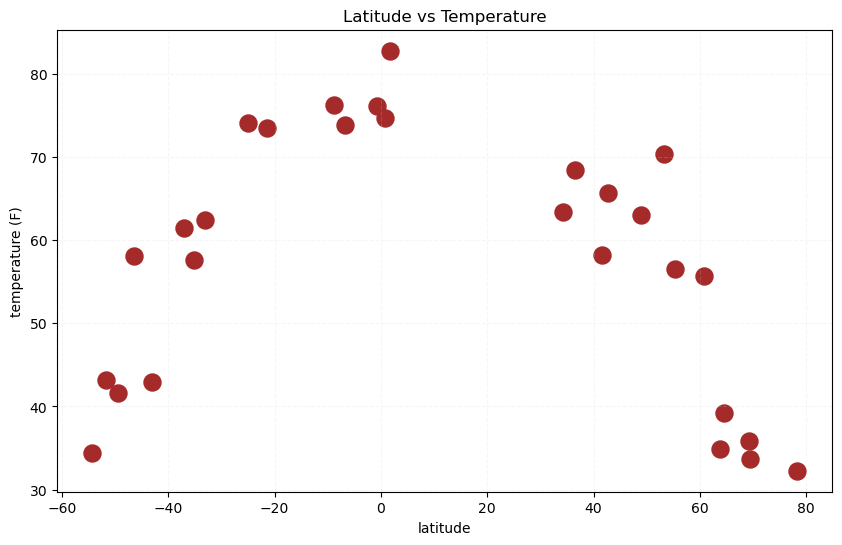

In [76]:
# Build scatter plot for latitude vs. temperature

plt.figure(figsize=(10,6))

plt.scatter(df.latitude, df.temperature, color="brown", s=150)
plt.xlabel("latitude")
plt.ylabel("temperature (F)")
plt.title("Latitude vs Temperature")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

#### Latitude Vs. Humidity

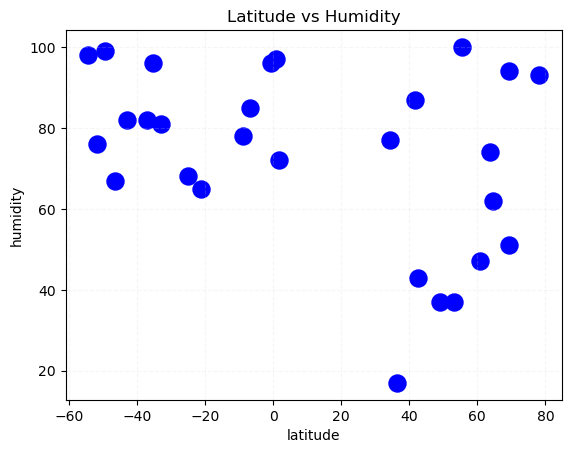

In [77]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(df.latitude, df.humidity, color="blue", s=150)
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.title("Latitude vs Humidity")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

#### Latitude Vs. Cloudiness

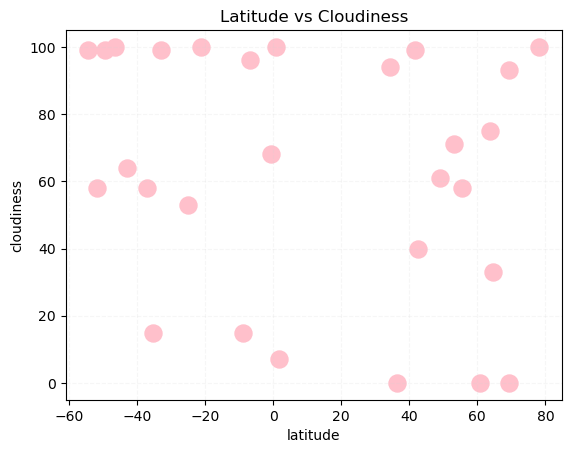

In [78]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(df.latitude, df.cloudiness, color="pink", s=150)
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.title("Latitude vs Cloudiness")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

#### Latitude vs. Wind Speed Plot

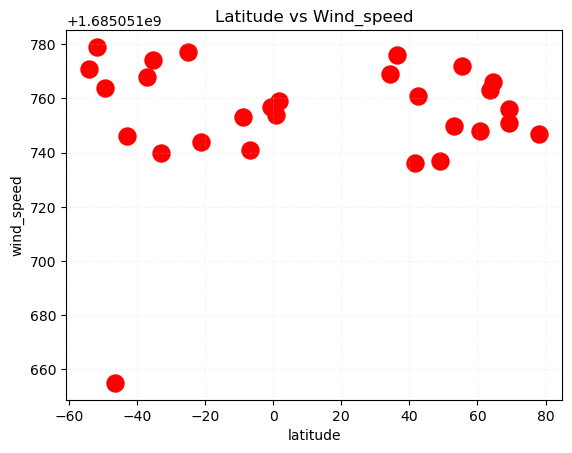

In [79]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(df.latitude, df.wind_speed, color="red", s=150)
plt.xlabel("latitude")
plt.ylabel("wind_speed")
plt.title("Latitude vs Wind_speed")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()



---

## Requirement 2: Compute Linear Regression for Each Relationship


In [80]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [81]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df.loc[df.latitude >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,Mollerussa,ES,41.633093,0.895495,58.23,1018,87,1685051736,99,1685051736
1,Dolbeau-Mistassini,CA,48.883231,-72.233734,63.00,1021,37,1685051737,61,1685051737
2,Longyearbyen,NO,78.223156,15.646366,32.27,985,93,1685051747,100,1685051747
3,Bethel,US,60.792222,-161.755833,55.74,1004,47,1685051748,0,1685051748
4,Samara,RU,53.198627,50.113987,70.34,1019,37,1685051750,71,1685051750


In [82]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df.loc[df.latitude < 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,Invercargill City,NZ,-46.411847,168.347063,58.14,998,67,1685051655,100,1685051655
1,East London,ZA,-33.019160,27.899857,62.49,1011,81,1685051740,99,1685051740
2,Lae,PG,-6.730198,147.000811,73.81,1012,85,1685051741,96,1685051741
3,ʻOhonua,TO,-21.341322,-174.956145,73.47,1013,65,1685051744,100,1685051744
4,Blackmans Bay,AU,-43.004684,147.317986,42.98,1002,82,1685051746,64,1685051746


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7481458722059013


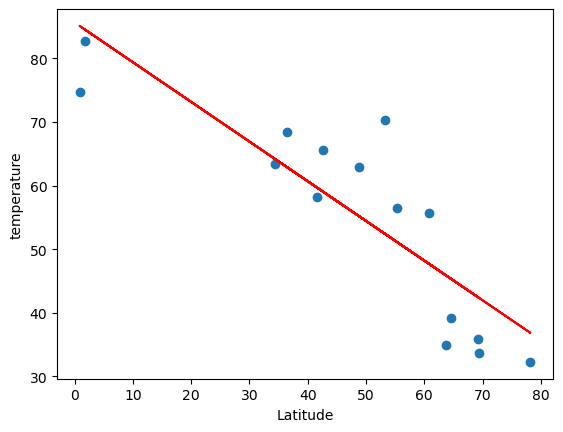

In [83]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["temperature"]
plot_linear_regression(x_values, y_values, "temperature",(6,-10))

In [84]:
import statsmodels.api as sm

In [85]:
X = northern_hemi_df["latitude"]
y = northern_hemi_df["temperature"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     38.62
Date:                Thu, 25 May 2023   Prob (F-statistic):           3.15e-05
Time:                        22:07:34   Log-Likelihood:                -52.491
No. Observations:                  15   AIC:                             109.0
Df Residuals:                      13   BIC:                             110.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.6477      5.314     16.119      0.0

C:\Users\rajag\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


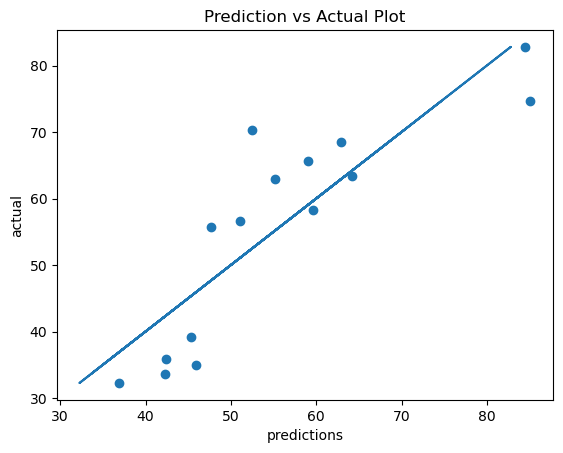

In [86]:
plt.scatter(predictions, y)
plt.xlabel("predictions")
plt.ylabel("actual")
plt.title("Prediction vs Actual Plot")
plt.plot(y, y)
plt.show()

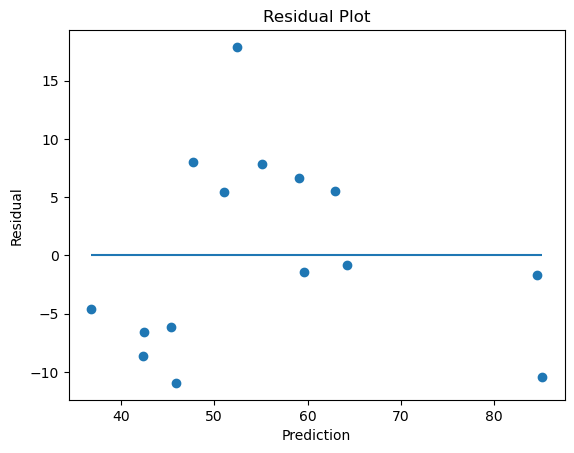

In [87]:
residuals = y - predictions

plt.scatter(predictions, residuals)
plt.hlines(0, min(predictions), max(predictions))
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

The r-value is: 0.8156278939415699


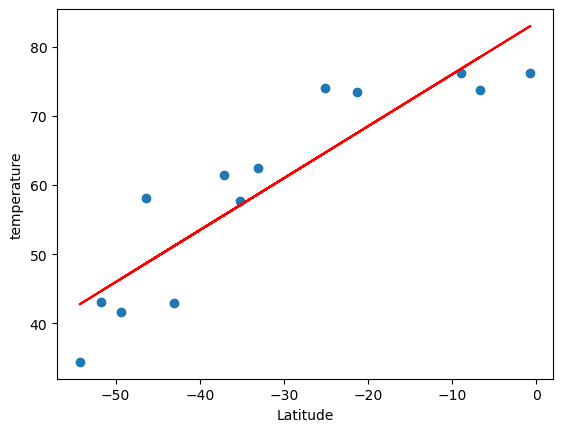

In [88]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["temperature"]
plot_linear_regression(x_values, y_values, "temperature",(6,-10))